In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("train.csv", parse_dates=["date"])
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df.head()


,date,store,item,sales,year,month,day,dayofweek
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


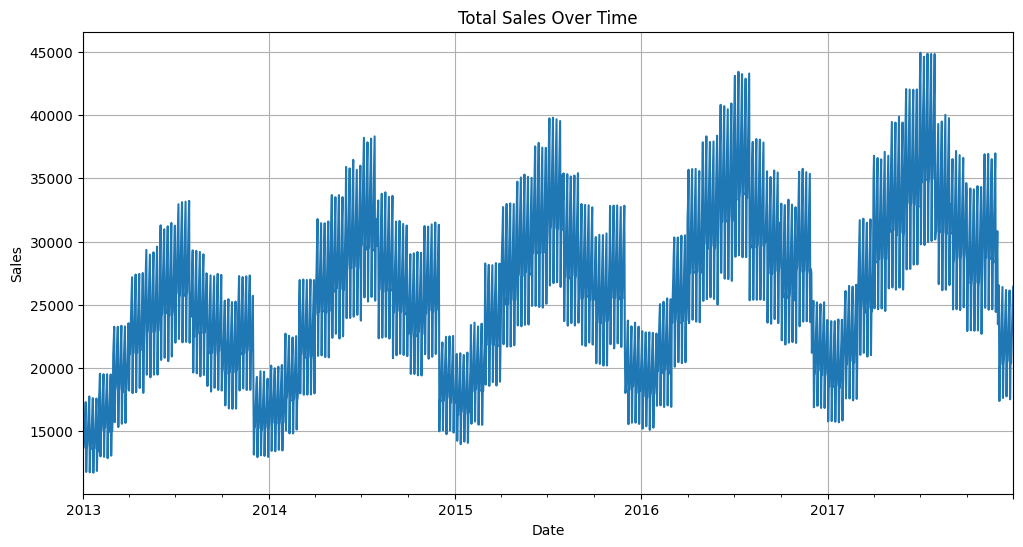

In [4]:
plt.figure(figsize=(12,6))
df.groupby("date")["sales"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


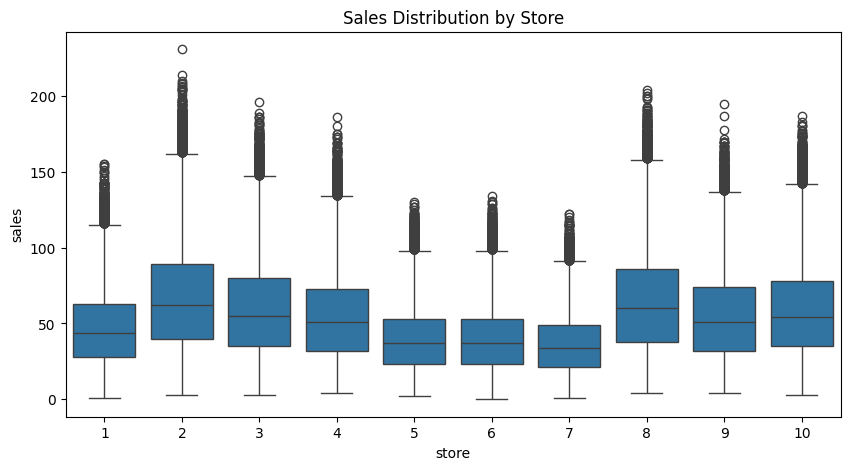

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(x="store", y="sales", data=df)
plt.title("Sales Distribution by Store")
plt.show()


In [6]:
features = ['store', 'item', 'year', 'month', 'day', 'dayofweek']
X = df[features]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 8.27


In [10]:
sample = pd.DataFrame([{
    'store': 3,
    'item': 10,
    'year': 2017,
    'month': 5,
    'day': 15,
    'dayofweek': 0  # Monday
}])
prediction = model.predict(sample)[0]
print(f"Predicted sales: {int(prediction)} units")


Predicted sales: 78 units


In [11]:
import joblib
joblib.dump(model, 'sales_model.pkl')


['sales_model.pkl']